# House Price Forecast per zipcode using NeuralProphet
### A Time-Series Modeling Library based on Neural-Networks

![nprophet](https://user-images.githubusercontent.com/67468718/121110043-80e46780-c7c1-11eb-8aa4-9b9330156d09.JPG)


## 1. Introduction: NeuralProphet vs. Prophet

**NeuralProphet** is a python library for modeling time-series data based on neural networks. It’s built on top of **PyTorch** and is heavily inspired by **Facebook Prophet** and **AR-Net** libraries.

From the library name, you may ask what is the main difference between Facebook’s Prophet library and NeuralProphet. According to NeuralProphet’s [documentation](http://neuralprophet.com/changes-from-prophet/), the added features are:
 * Using PyTorch’s Gradient Descent optimization engine making the modeling process much faster than Prophet
 * Using AR-Net for modeling time-series autocorrelation (aka serial correlation)
 * Custom losses and metrics
 * Having configurable non-linear layers of feed-forward neural networks,
 * etc.


## 2. Install

For free error **NeuralProphet** installation, please create a fresh conda enviroment before proceeding with **NeuralProphet** installation and review all packages versions to make sure they're matching **NeuralProphet** Requirements to avoid any conflicts.

There is no pip or conda package for this library at this time. You can install it by cloning the repository and installing it running pip install .However, if you are going to use the package in a Jupyter Notebook environment, you should install their live version pip install .[live]. This will provide more features such as a live plot of train and validation loss using plot_live_loss().

In [ ]:
git clone https://github.com/ourownstory/neural_prophet 
cd neural_prophet 
pip install .[live]

## 3. Import relevant libraries

In [2]:
# Install the necessary libraries:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from neuralprophet import NeuralProphet
import os
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
savefig_options = dict(format="png", bbox_inches="tight")
plt.style.use('ggplot')
%matplotlib inline
import pickle

## 4. Load and view the data

**Data Source:**

**[Redfin](https://www.redfin.com/)** is a real estate brokerage, meaning they have direct access to data from local multiple listing services, as well as insight from their real estate agents across the country. That’s why they’re able to offer the most reliable data on the state of the housing market. They publish existing industry data faster, and offer additional data on tours and offers that no one else has. Using the tools **[here](https://www.redfin.com/news/data-center/)**, everyone can visualize and download housing market data for metropolitan areas, cities, neighborhoods and zip codes across the nation.

**Focus Area**

We're only interested in specific area in North California representing 31 Zipcodes as shown below: 

|||||||
|:--:|:--:|:--:|:--:|:--:|:--:|
|94506|	94541|	94568|	94521|	94551|	94588|
|94507	|94544|	94577|	94523|	94553|	94595|
|94509	|94545	|94578|	94526|	94565|	94597|
|94518	|94546	|94582|	94531|	94566|	94598|
|94519	|94550|	94583|	94801|	94804|	95050|
|95051					



In [ ]:
# Check Current Directory:
os.getcwd()

In [ ]:
# Changing the directory:
os.chdir(r"path/Feature_Engineering/datasets")

In [ ]:
#Confirm the directory:
os.getcwd()

In [ ]:
# List files/folders in the cd:
os.listdir()

### 4.1 Load the data 

In [5]:
df = pd.read_csv('redfine_houses_sales_2012_2021.csv', infer_datetime_format=True)

In [6]:
# Let's look at the top 5 rows of the data:
df.head()

zipcode  2012-02  2012-03  2012-04  2012-05  2012-06  2012-07  2012-08  \
0    94506   843000   825000   832000   867000   880000   895000   881000   
1    94507  1235000  1055000  1170000  1140000  1225000  1175000  1249000   
2    94509   149000   148000   150000   155000   160000   172000   181000   
3    94510   270000   281000   285000   290000   303000   313000   326000   
4    94513   290000   295000   300000   305000   314000   328000   344000   

   2012-09  2012-10  ...  2020-07  2020-08  2020-09  2020-10  2020-11  \
0   866000   840000  ...  1478000  1497000  1490000  1525000  1550000   
1  1215000  1225000  ...  1850000  1800000  1840000  2010000  1901000   
2   185000   199000  ...   437000   445000   460000   460000   470000   
3   335000   338000  ...   593000   650000   670000   675000   680000   
4   340000   335000  ...   635000   660000   675000   686000   678000   

   2020-12  2021-01  2021-02  2021-03  2021-04  
0  1610000  1615000  1651000  1835000  1851000  
1  1960000  1935000  2100000  2298000  2338000  
2   465000   475000   485000   501000   488000  
3   668000   685000   665000   715000   728000  
4   688000   696000   716000   755000   778000  

[5 rows x 112 columns]

In [7]:
#Now, let's reshape df dataframe for better visibility using .melt(): df
df = pd.melt(df, id_vars=['zipcode'], value_vars=df.columns[1:])

In [8]:
df.head()

zipcode variable    value
0    94506  2012-02   843000
1    94507  2012-02  1235000
2    94509  2012-02   149000
3    94510  2012-02   270000
4    94513  2012-02   290000

In [9]:
#let's reorder columns:
df = df [['variable', 'value', 'zipcode']]
df.head()

variable    value  zipcode
0  2012-02   843000    94506
1  2012-02  1235000    94507
2  2012-02   149000    94509
3  2012-02   270000    94510
4  2012-02   290000    94513

In [10]:
df.tail()

variable    value  zipcode
7765  2021-04   560000    94804
7766  2021-04   783000    94805
7767  2021-04   585000    94806
7768  2021-04  1315000    95050
7769  2021-04  1510000    95051

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7770 entries, 0 to 7769
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   variable  7770 non-null   object
 1   value     7770 non-null   int64 
 2   zipcode   7770 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 182.2+ KB


In [12]:
# Let's look at the shape of the data:
shape = df.shape
print(f'Our data has {shape[0]} Rows and {shape[1]} Columns!.')

Our data has 7770 Rows and 3 Columns!.


### 4.2 Missing Data

In [13]:
#First let's have a general view of tracks df:
ratings_missing = pd.concat([df.nunique(), df.dtypes, df.isnull().sum(), 100*df.isnull().mean()], axis=1)
ratings_missing.columns = [['unique_count', 'data_type', 'missing_count', 'missing%']]
ratings_missing

unique_count data_type missing_count missing%
variable          111    object             0      0.0
value            1261     int64             0      0.0
zipcode            70     int64             0      0.0

**Awesome, There's no missing values any more.**

### 4.3 Data Types - Time Column

In [14]:
# Now let's check time column "variable" data type:
df.variable.dtypes

dtype('O')

In [15]:
df['variable'] = df['variable'].astype('datetime64[ns]')
df['value'] = df['value'].astype('float64')

In [16]:
df['value'] = df['value'].astype('float64')

In [17]:
df['zipcode'] = df['zipcode'].astype('float64')

In [18]:
df.dtypes

variable    datetime64[ns]
value              float64
zipcode            float64
dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7770 entries, 0 to 7769
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   variable  7770 non-null   datetime64[ns]
 1   value     7770 non-null   float64       
 2   zipcode   7770 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 182.2 KB


Alright, now, let's rename the following coulmns: **'variable' to 'year_month' and 'value' to 'median_sale_price'!.

In [20]:
# Let's rename the following columns:  'month_date_yyyymm' to 'year_month', 'postal_code' to 'zipcode' and 'zip_name' to 'city':
df.rename(columns = {list(df)[0]: 'year_month', list(df)[1]: 'median_sale_price'}, inplace = True)
df.head()

year_month  median_sale_price  zipcode
0 2012-02-01           843000.0  94506.0
1 2012-02-01          1235000.0  94507.0
2 2012-02-01           149000.0  94509.0
3 2012-02-01           270000.0  94510.0
4 2012-02-01           290000.0  94513.0

### 4.4 Exploratory Data Analysis (EDA)

#### 4.4.1 NCAL TOP Zipcodes by Avg listing Price 2016-2021

In [21]:
df_zip = df.groupby('zipcode')['median_sale_price']
df_zip = df_zip.mean()
df_zip = df_zip.sort_values(ascending=True).head(70)


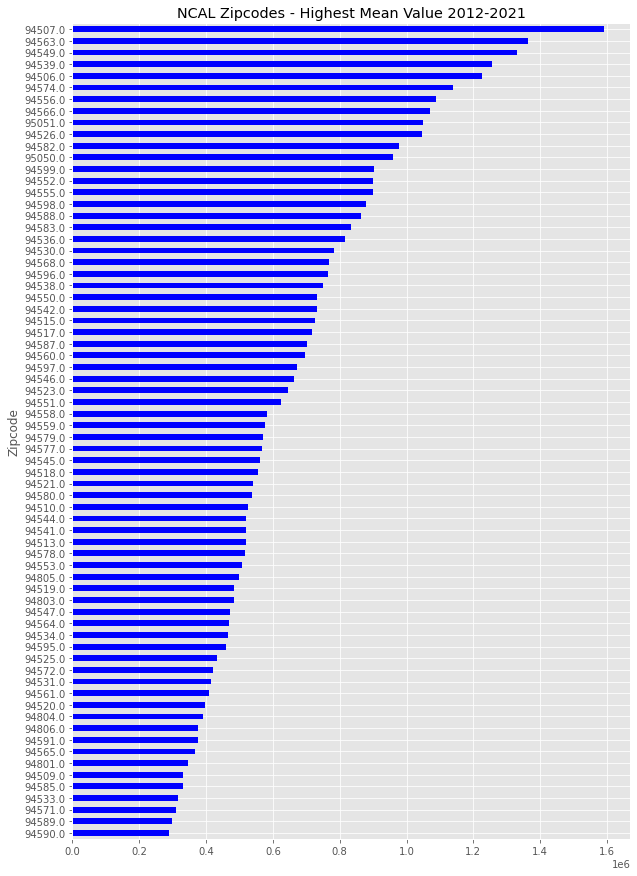

In [22]:
df_zip.plot.barh(color='blue', figsize=(10,15))
plt.title('NCAL Zipcodes - Highest Mean Value 2012-2021')
plt.ylabel('Zipcode')
plt.show()

#### 4.4.2 Median Listing Price For top 10 and lower 10 Zipcodes 2012-2021

In [23]:
top_zpcodes = [94507, 94563, 94549, 94539, 94506, 94574, 94556, 94566, 945051, 94526]
low_zpcodes = [94806, 94591, 94565, 94801, 94509, 94585, 94533, 94571, 94589, 94590]

In [24]:
top = df[df['zipcode'].isin(top_zpcodes)]
low = df[df['zipcode'].isin(low_zpcodes)]

In [25]:
fig = px.line(top, x="year_month", y="median_sale_price", color='zipcode', title='Top NCAL Zipcodes House Sale Price: 2012-2021')
fig.show()

In [26]:
fig = px.line(low, x="year_month", y="median_sale_price", color='zipcode', title='Low NCAL Zipcodes House Sale Price: 2012-2021')
fig.show()

## 5. Neural Prophet Input Data

The input data format expected by the **neural_prophet package** is the same as in original **prophet**. It should have two columns, **ds** which has the timestamps and **y** column which contains the observed values of the time series. , so let's pick one **zipcode=94568**.

In [27]:
df.head()

year_month  median_sale_price  zipcode
0 2012-02-01           843000.0  94506.0
1 2012-02-01          1235000.0  94507.0
2 2012-02-01           149000.0  94509.0
3 2012-02-01           270000.0  94510.0
4 2012-02-01           290000.0  94513.0

In [28]:
# Let's rename the following columns for Greykite:
df.rename(columns = {list(df)[0]: 'ds', list(df)[1]: 'y', list(df)[2]: 'zipcode'}, inplace = True)
df.head()

ds          y  zipcode
0 2012-02-01   843000.0  94506.0
1 2012-02-01  1235000.0  94507.0
2 2012-02-01   149000.0  94509.0
3 2012-02-01   270000.0  94510.0
4 2012-02-01   290000.0  94513.0

In [29]:
# Now, let's filter in specif zipcode and reset index so the index will start from zero for the min value:
zip_filter = df[df['zipcode']==94568]
zip_filter.drop('zipcode', axis=1, inplace=True)
zip_filter.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\aktha\anaconda3\envs\nprophet\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




ds         y
42  2012-02-01  390000.0
112 2012-03-01  400000.0
182 2012-04-01  410000.0
252 2012-05-01  438000.0
322 2012-06-01  470000.0

In [30]:
zip_filter.head()

ds         y
42  2012-02-01  390000.0
112 2012-03-01  400000.0
182 2012-04-01  410000.0
252 2012-05-01  438000.0
322 2012-06-01  470000.0

In [31]:
df['ds'][df. index[-1]]

Timestamp('2021-04-01 00:00:00')

## 6. Simple Model

A simple model with neural_prophet for this dataset can be fitted by creating an object of the NeuralProphet class as follows and calling the fit function. This fits a model with the default settings in the model. For more details on these default settings, refer to the Section on Hyperparameter Selction.

### 6.1 Fitting the Model

In [32]:
model = NeuralProphet()
metrics = model.fit(zip_filter, freq="MS")#"MS" for Monthly at start date, "H" for hourly, "D" for daily, "W" for weekly, etc. 
                    #plot_live_loss=True, 
                    #validate_each_epoch=True) 
metrics.head(3)

INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 362


  0%|          | 0/204 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.21E-02, min: 1.03E+00
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 4.05E-01
Epoch[362/362]: 100%|██████████████████████████████████████████████████████████| 362/362 [00:14<00:00, 24.70it/s, SmoothL1Loss=0.000965, MAE=1.8e+4, MSE=6.68e+8, RegLoss=0]


SmoothL1Loss            MAE           MSE  RegLoss
0      1.033934  869065.637950  1.058448e+12      0.0
1      0.970577  829305.103041  9.784952e+11      0.0
2      0.906875  788875.741554  8.998893e+11      0.0

Once the model is fitted, we can make forecasts using the fitted model. For this, we first need to create a future dataframe consisting of the time steps into the future that we need to forecast for. NeuralProphet provides the helper function make_future_dataframe for this purpose. Note that the the frequency of data is set globally here.

In [33]:
future = model.make_future_dataframe(zip_filter, periods=28, n_historic_predictions=len(df)) # 28 referes 28 Months
future.tail(3)

WARNING - (NP.forecaster.make_future_dataframe) - Insufficient data for 7770 historic forecasts, reduced to 111.


ds   y         t  y_scaled
136 2023-06-01 NaN  1.236331       NaN
137 2023-07-01 NaN  1.245294       NaN
138 2023-08-01 NaN  1.254556       NaN

Note: 'y' and 'y_scaled' are not given for the period extending into the future, as we do not know their true values.

In [50]:
forecast = model.predict(future)
forecast.tail(20).round()
#print(list(forecast.columns))

ds          y      yhat1  residual1      trend  season_yearly
105 2020-11-01   978000.0   974147.0    -3853.0  1002840.0       -28693.0
106 2020-12-01  1030000.0   994448.0   -35552.0  1013277.0       -18829.0
107 2021-01-01  1050000.0  1008772.0   -41228.0  1024063.0       -15291.0
108 2021-02-01  1085000.0  1026300.0   -58700.0  1034849.0        -8548.0
109 2021-03-01  1095000.0  1034623.0   -60377.0  1044591.0        -9968.0
110 2021-04-01  1125000.0  1060455.0   -64545.0  1055376.0         5079.0
111 2021-05-01        NaN  1078308.0        NaN  1065814.0        12493.0
112 2021-06-01        NaN  1101894.0        NaN  1076600.0        25294.0
113 2021-07-01        NaN  1109678.0        NaN  1087038.0        22640.0
114 2021-08-01        NaN  1120136.0        NaN  1097823.0        22313.0
115 2021-09-01        NaN  1113220.0        NaN  1108609.0         4611.0
116 2021-10-01        NaN  1111602.0        NaN  1119047.0        -7445.0
117 2021-11-01        NaN  1102165.0        NaN  1129832.0       -27667.0
118 2021-12-01        NaN  1120388.0        NaN  1140270.0       -19883.0
119 2022-01-01        NaN  1136678.0        NaN  1151056.0       -14378.0
120 2022-02-01        NaN  1152422.0        NaN  1161842.0        -9419.0
121 2022-03-01        NaN  1162424.0        NaN  1171583.0        -9159.0
122 2022-04-01        NaN  1186428.0        NaN  1182369.0         4059.0
123 2022-05-01        NaN  1206155.0        NaN  1192807.0        13349.0
124 2022-06-01        NaN  1227885.0        NaN  1203592.0        24293.0

The returned forecast dataframe contains the original datestamps, 'y' values, the predicted 'yhat' values, residuals and all the individual model components.

### 6.2 Plotting

With the forecasts obtained from the model, you can visualize them.

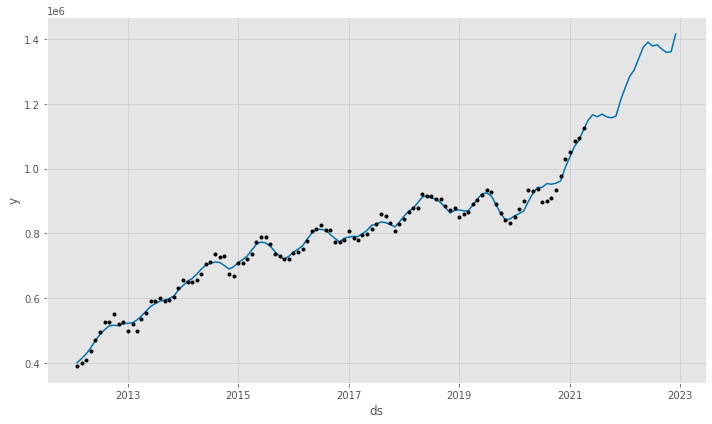

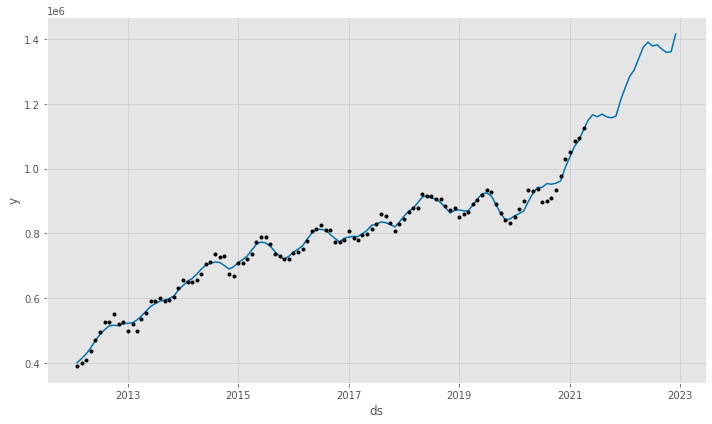

In [153]:
# plots the model predictions
model.plot(forecast)

This is a simple model with a trend, a weekly seasonality and a yearly seasonality estimated by default. You can also look at the individual components separately as below.

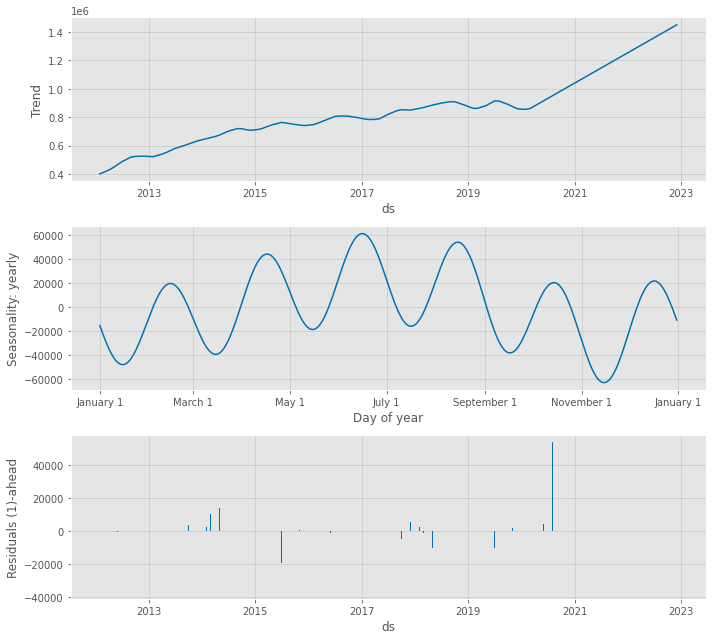

In [154]:
# plots the individual forecast components for the given time period.
fig_comp = model.plot_components(forecast, residuals=True)

The individual coefficient values can also be plotted as below to gain further insights.

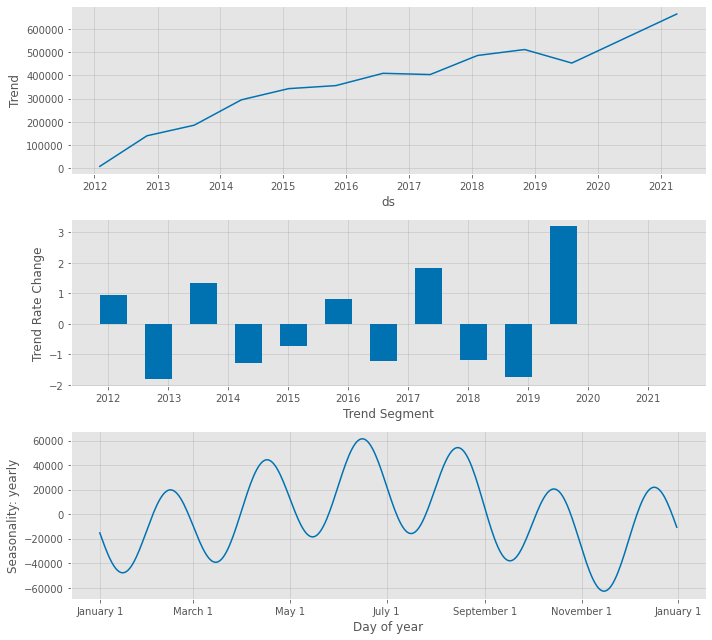

In [38]:
# visualizes the model parameters.
fig_param = model.plot_parameters()

## 7. Adjusting Trend

The default values work fairly well in this example. However, the default of 5 changepoints may not be adequate if the actual change in trend happens to fall in a region between the points.


### 7.1 Increasing Trend Flexibility

We can address this by increasing the number of changepoints, giving the trend more flexibility, at the danger of overfitting.

Let's try what happens if we increase the number of changepoints to 30. Additionally, we can increase the range of data on which we fit trend changepoints to only exlude the last 10 percent (default is 20 percent).

In [156]:
model_final = NeuralProphet(
                           n_changepoints=40,
                           changepoints_range=0.90,
                           num_hidden_layers=2,
                           #learning_rate=1.0,
                           seasonality_mode="multiplicative",
                           #n_lags=14,
                           #n_forecasts=14,
                            )

metrics = model_final.fit(zip_filter, freq='MS')



INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 362


  0%|          | 0/204 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.17E-01, min: 9.45E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 4.71E-01
Epoch[362/362]: 100%|█████████████████████████████████████████████████████████| 362/362 [00:13<00:00, 27.57it/s, SmoothL1Loss=0.000368, MAE=1.21e+4, MSE=2.54e+8, RegLoss=0]


In [157]:
future = model_final.make_future_dataframe(zip_filter, periods=20, n_historic_predictions=len(df)) #forecast for 20 Months
forecast = model_final.predict(future)

WARNING - (NP.forecaster.make_future_dataframe) - Insufficient data for 7770 historic forecasts, reduced to 111.


In [159]:
forecast.tail(25).round()

ds          y      yhat1  residual1      trend  season_yearly
106 2020-12-01  1030000.0  1002903.0   -27097.0  1023549.0           -0.0
107 2021-01-01  1050000.0  1035944.0   -14056.0  1041831.0           -0.0
108 2021-02-01  1085000.0  1067794.0   -17206.0  1060112.0            0.0
109 2021-03-01  1095000.0  1084845.0   -10155.0  1076624.0            0.0
110 2021-04-01  1125000.0  1119294.0    -5706.0  1094906.0            0.0
111 2021-05-01        NaN  1150137.0        NaN  1112598.0            0.0
112 2021-06-01        NaN  1169225.0        NaN  1130879.0            0.0
113 2021-07-01        NaN  1164865.0        NaN  1148571.0            0.0
114 2021-08-01        NaN  1173502.0        NaN  1166852.0            0.0
115 2021-09-01        NaN  1164837.0        NaN  1185134.0           -0.0
116 2021-10-01        NaN  1161158.0        NaN  1202825.0           -0.0
117 2021-11-01        NaN  1164158.0        NaN  1221107.0           -0.0
118 2021-12-01        NaN  1210306.0        NaN  1238798.0           -0.0
119 2022-01-01        NaN  1249677.0        NaN  1257080.0           -0.0
120 2022-02-01        NaN  1284918.0        NaN  1275361.0            0.0
121 2022-03-01        NaN  1303159.0        NaN  1291874.0            0.0
122 2022-04-01        NaN  1341211.0        NaN  1310155.0            0.0
123 2022-05-01        NaN  1377082.0        NaN  1327847.0            0.0
124 2022-06-01        NaN  1395152.0        NaN  1346128.0            0.0
125 2022-07-01        NaN  1385573.0        NaN  1363820.0            0.0
126 2022-08-01        NaN  1390070.0        NaN  1382101.0            0.0
127 2022-09-01        NaN  1375552.0        NaN  1400383.0           -0.0
128 2022-10-01        NaN  1364912.0        NaN  1418074.0           -0.0
129 2022-11-01        NaN  1365261.0        NaN  1436356.0           -0.0
130 2022-12-01        NaN  1417285.0        NaN  1454048.0           -0.0

In [160]:
import plotly.graph_objects as go

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['y'], name='Actual Price', opacity=0.7,
                         line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x=forecast['ds'],y=forecast['yhat1'], name = 'Forecast Price',
                         line=dict(color='firebrick', width=4, dash='dash')))
fig.add_vline(x=zip_filter['ds'][zip_filter. index[-1]], line_width=3, line_dash="dot", line_color="black")
fig.add_vrect(x0="2021-05-01", x1="2022-02-01", line_width=0, fillcolor="red", opacity=0.2) #annotation_text="6M forecast", annotation_position="inside top right"
fig.add_vrect(x0="2022-03-01", x1="2022-12-01", line_width=0, fillcolor="green", opacity=0.2)#, annotation_text="12M forecast", annotation_position="inside top right"
# Edit the layout
fig.update_layout(title='House Sale Price Actual vs Forecast [Neural Prophet]',
                   xaxis_title='Time',
                   yaxis_title='House Price')
fig.show()

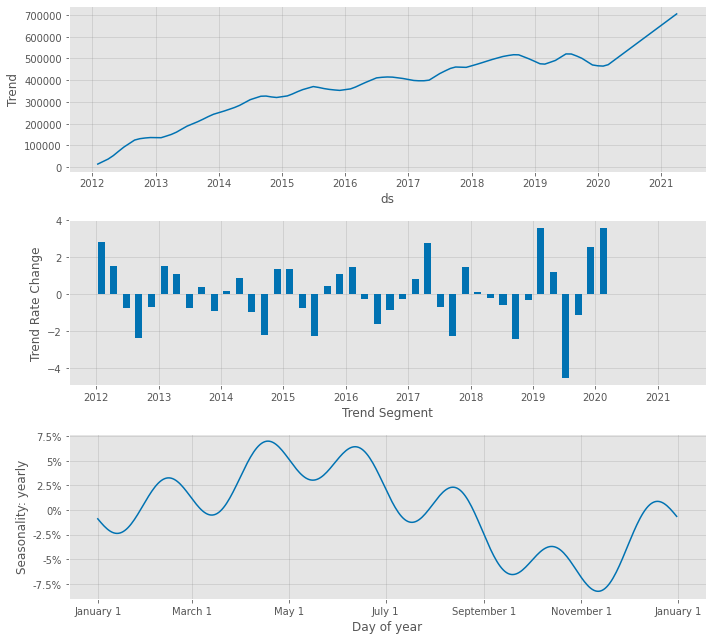

In [161]:
fig2 = model_final.plot_parameters()

### 7.2 Automatic trendpoint selection

By adding regularization, we can achieve an automatic selection of the most relevant changepoints and draw the rate changes of other points close to zero.

In [162]:
m1 = NeuralProphet(
    n_changepoints=30,
    trend_reg=1.00,
    changepoints_range=0.90,    
)
metrics = m1.fit(zip_filter, freq="MS")
future = m1.make_future_dataframe(zip_filter, periods=20, n_historic_predictions=len(df))
forecast = m1.predict(future)

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 362


  0%|          | 0/204 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.42E-01, min: 3.60E-02
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 6.80E-02
Epoch[362/362]: 100%|██████████████████████████████████████████████████████| 362/362 [00:11<00:00, 31.18it/s, SmoothL1Loss=0.00124, MAE=2.2e+4, MSE=8.54e+8, RegLoss=0.0144]
WARNING - (NP.forecaster.make_future_dataframe) - Insufficient data for 7770 historic forecasts, reduced to 111.


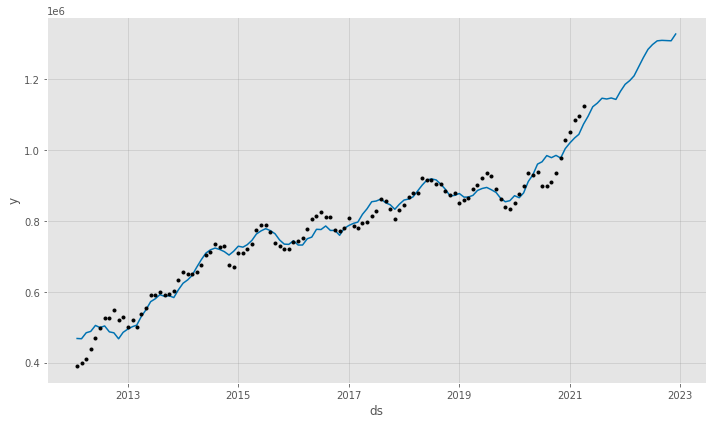

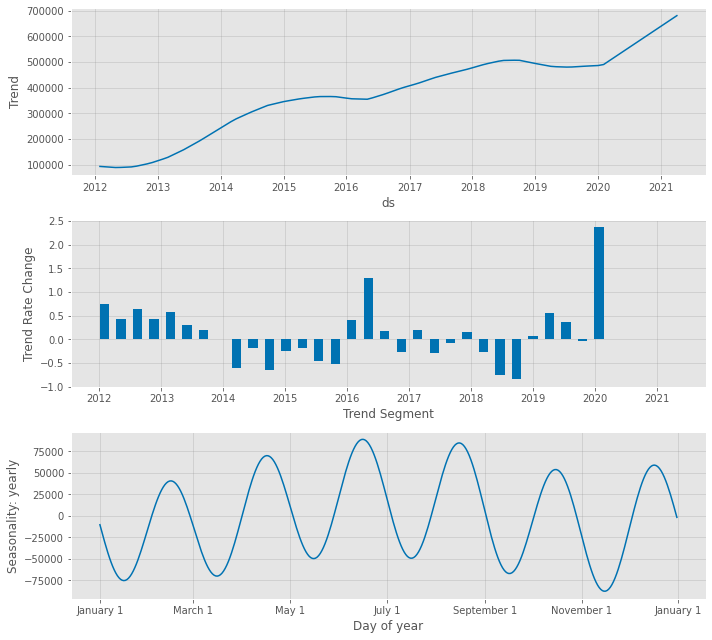

In [163]:
fig1 = m1.plot(forecast)
fig2 = m1.plot_parameters()

### 7.3 Manual Trend Changepoints

You can also manually specify the trend changepoints.

Note: A changepoint will always be added at the beginning. You can ignore it.


In [165]:
m2 = NeuralProphet(
    changepoints=['2018-03-01', '2020-03-01'], learning_rate=0.3,
)
metrics = m2.fit(zip_filter, freq="MS")
future = m2.make_future_dataframe(zip_filter, periods=28,  n_historic_predictions=len(df))
forecast = m2.predict(future)

INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 362
Epoch[362/362]: 100%|██████████████████████████████████████████████████████████| 362/362 [00:12<00:00, 28.43it/s, SmoothL1Loss=0.00167, MAE=2.67e+4, MSE=1.15e+9, RegLoss=0]
WARNING - (NP.forecaster.make_future_dataframe) - Insufficient data for 7770 historic forecasts, reduced to 111.


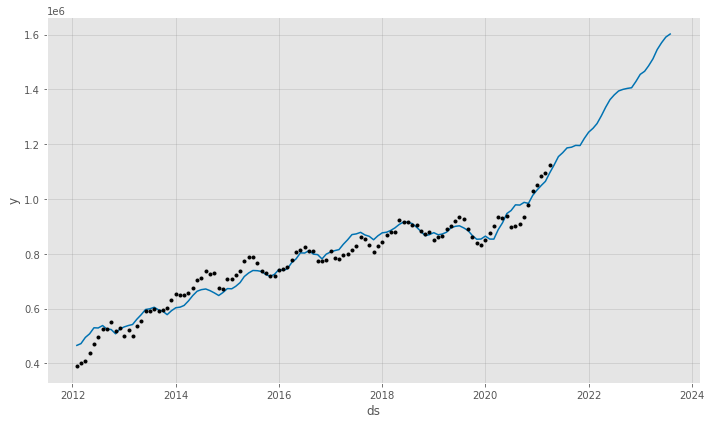

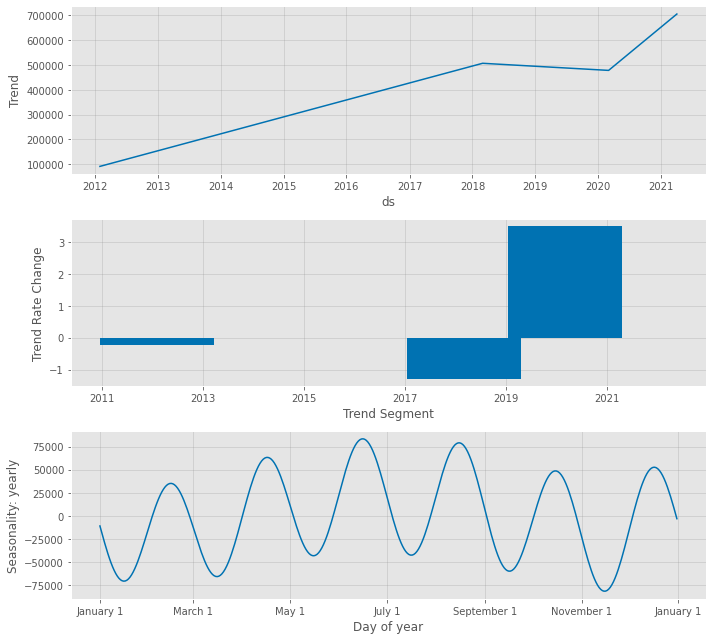

In [166]:
fig1 = m2.plot(forecast)
fig2 = m2.plot_parameters()

### 7.4 Fine-tuning Trend Flexibility

We can adjust the regularization strength to get more or less points with a non-zero rate change.

Note: for too high regularization strengths, the model fitting process becomes unstable.

In [167]:
m3 = NeuralProphet(
    n_changepoints=30,
    trend_reg=3.00,
    changepoints_range=0.90,   
)
metrics = m3.fit(zip_filter, freq="MS")
future = m3.make_future_dataframe(zip_filter, periods=28, n_historic_predictions=len(df))
forecast = m3.predict(future)

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 362


  0%|          | 0/204 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.93E-02, min: 2.65E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 1.85E-01
Epoch[362/362]: 100%|█████████████████████████████████████████████████████| 362/362 [00:11<00:00, 30.24it/s, SmoothL1Loss=0.00105, MAE=2.06e+4, MSE=7.25e+8, RegLoss=0.0467]
WARNING - (NP.forecaster.make_future_dataframe) - Insufficient data for 7770 historic forecasts, reduced to 111.


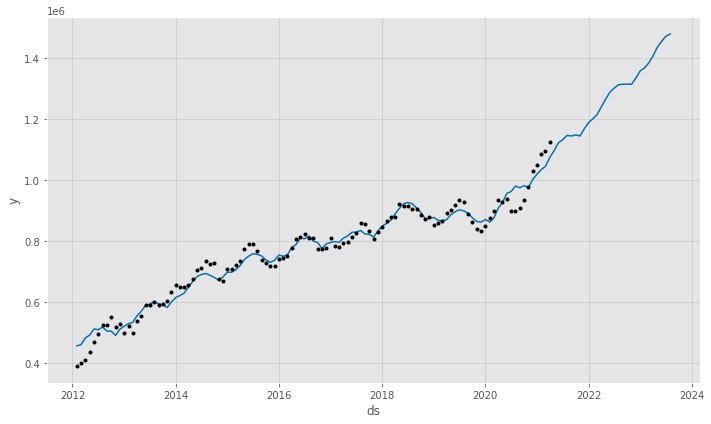

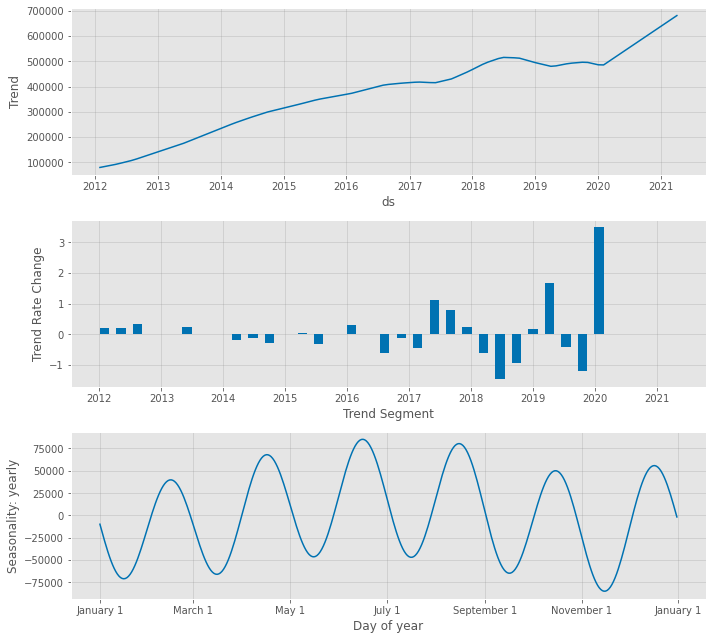

In [168]:
fig1 = m3.plot(forecast)
fig2 = m3.plot_parameters()

## 8. Autoregression

n_lags defines whether the AR-Net is enabled (if n_lags > 0) or not. The value for n_lags is usually recommended to be greater than n_forecasts, if possible since it is preferable for the FFNNs to encounter at least n_forecasts length of the past in order to predict n_forecasts into the future. Thus, n_lags determine how far into the past the auto-regressive dependencies should be considered. This could be a value chosen based on either domain expertise or an empirical analysis.


In [171]:
m4 = NeuralProphet(
    n_lags=28,
    changepoints_range=0.95,
    n_changepoints=30,
    weekly_seasonality=False,
    batch_size=64,
    epochs=10,
    learning_rate=1.0,
)
metrics = m4.fit(zip_filter, freq='MS')

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
Epoch[10/10]: 100%|████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 96.15it/s, SmoothL1Loss=1.73, MAE=1.29e+6, MSE=2.17e+12, RegLoss=0]


Please note that a model with an autoregressive component can be harder to fit. The automatic selection of hyperparameters may not lead to ideal results. For best results, consider changing these manually (in order of importance):

 * learning_rate
 * epochs
 * batch_size
 
The automatically set hyperparameters (printed out as 'INFO' level logs) can serve as a good starting point.

WARNING - (NP.forecaster.make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 1.


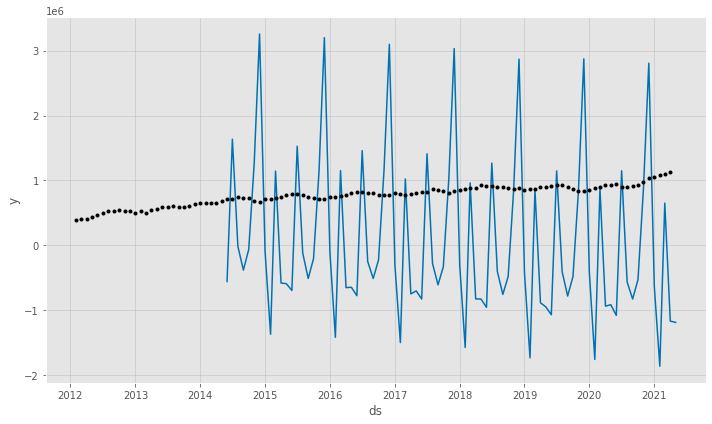

In [172]:
future = m4.make_future_dataframe(zip_filter, periods=28, n_historic_predictions=True)
forecast = m4.predict(future)
fig = m4.plot(forecast)

The predictions are now very precise, but this is not a big surprise, as we are just forecasting the very next 5 minutes.

When plotting the model parameters, the panel 'AR weight' displays the weight given to the 12 last observed values, these can be interpreted as our 'AR coefficients':

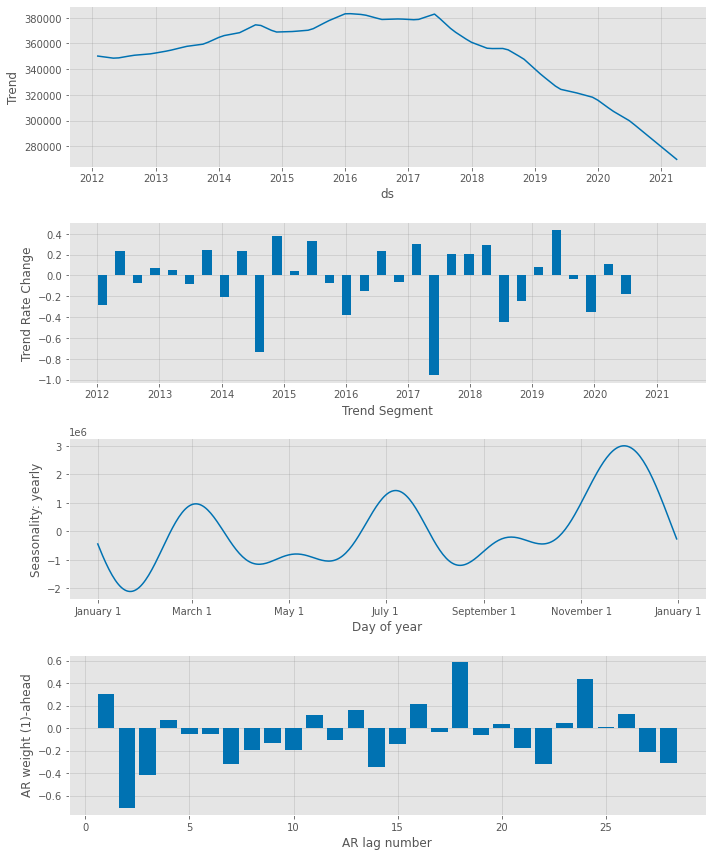

In [173]:
# fig_comp = m.plot_components(forecast)
m4 = m4.highlight_nth_step_ahead_of_each_forecast(1) # temporary workaround to plot actual AR weights
fig_param = m4.plot_parameters()

The 'AR weight' plot shows that the most recent observations are given significantly more weight compared to more distant observations.

### 8.1 Multi-step forecast

To predict multiple steps into the future, we could 'unroll' our single-step model, by predicting a step ahead, adding the forecasted value to our data, and then forecasting the next step until we reach the horizon we are interested in. However, there is a better way to do this: We can directly forecast multiple steps ahead with NeuralProphet.

We can set n_forecasts to the desired number of steps we would like to forecast (also known as 'forecast horizon'). NeuralProphet will forecast n_forecasts steps into the future, at every single step. Thus, we have n_forecasts overlapping predictions of vaying age at every historic point.

When icreasing the forecast horizon n_forecasts, we should also increase the number of past observations n_lags to at least the same value.

Here, we forecast the next 3 hours based on the last observed 6 hours, in 5-minute steps:

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
Epoch[10/10]: 100%|██████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 104.17it/s, SmoothL1Loss=0.374, MAE=4.45e+5, MSE=2.75e+11, RegLoss=0]
WARNING - (NP.forecaster.make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 40.


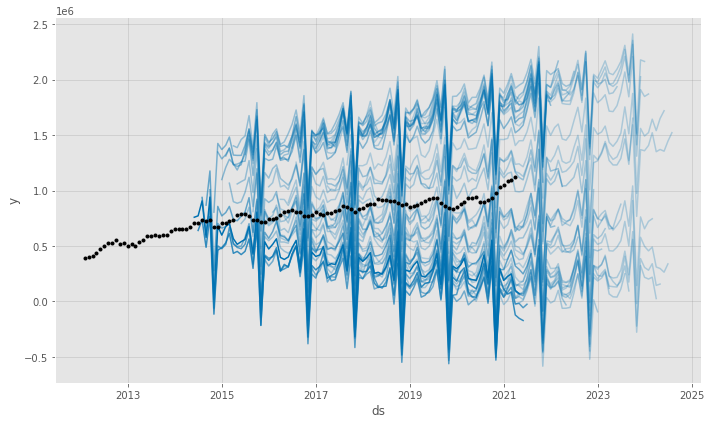

In [175]:
m5 = NeuralProphet(
    n_lags=28,
    n_forecasts=40,
    changepoints_range=0.95,
    n_changepoints=30,
    weekly_seasonality=False,
    batch_size=64,
    epochs=10,    
    learning_rate=0.3,
)
metrics = m5.fit(zip_filter, freq='MS')
future = m5.make_future_dataframe(zip_filter, periods=28, n_historic_predictions=True)
forecast = m5.predict(future)
fig = m5.plot(forecast)

In [ ]:
m5 = m5.highlight_nth_step_ahead_of_each_forecast(28)
fig = m5.plot_last_forecast(forecast, include_previous_forecasts=28)

### 8.2 Validation

Model validation for NeuralProphet can be done in two ways. Users can split the dataset manually to validate after the model fitting like below by specifying the fraction of data to be used for validation in the argument valida_p. This validation set is reserved from the end of the series.

In [176]:
model = NeuralProphet(
    n_changepoints=40,
    changepoints_range=0.90,
    num_hidden_layers=2,
    learning_rate=1.0,
)
df_train, df_val = model.split_df(zip_filter, valid_p=0.2, freq='MS')

In [177]:
train_metrics = model.fit(df_train, freq='MS')
val_metrics = model.test(df_val)

INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 400
Epoch[400/400]: 100%|███████████████████████████████████████████████████████████| 400/400 [00:13<00:00, 28.58it/s, SmoothL1Loss=0.00016, MAE=7.41e+3, MSE=8.5e+7, RegLoss=0]
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss       MAE            MSE
1         0.017 64251.547 9177787392.000


In [178]:
train_metrics.tail(5).round()

SmoothL1Loss     MAE         MSE  RegLoss
395           0.0  7410.0  85016010.0      0.0
396           0.0  7410.0  85010462.0      0.0
397           0.0  7410.0  84998359.0      0.0
398           0.0  7409.0  84992600.0      0.0
399           0.0  7409.0  84988330.0      0.0

In [179]:
val_metrics.round()

SmoothL1Loss      MAE           MSE
0           0.0  64252.0  9.177787e+09

## 9. Model Selection

In [32]:
from neuralprophet import set_random_seed 
set_random_seed(0)

In [36]:
model_final = NeuralProphet(
                           n_changepoints=40,
                           changepoints_range=0.90,
                           num_hidden_layers=2,
                           #learning_rate=1.0,
                           seasonality_mode="multiplicative",
                           #n_lags=14,
                           #n_forecasts=14,
                            )

metrics = model_final.fit(zip_filter, freq='MS')

INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 362


  0%|          | 0/204 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.95E-02, min: 2.42E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 1.32E-01
Epoch[362/362]: 100%|███████████████████████████████████████████████████████████████████| 362/362 [00:09<00:00, 37.35it/s, SmoothL1Loss=0.000542, MAE=1.51e+4, MSE=3.74e+8, RegLoss=0]


In [37]:
future = model_final.make_future_dataframe(zip_filter, periods=24, n_historic_predictions=len(df)) #forecast for 24 Months
forecast = model_final.predict(future)

WARNING - (NP.forecaster.make_future_dataframe) - Insufficient data for 7770 historic forecasts, reduced to 111.


In [39]:
forecast.tail(26)

ds          y        yhat1  residual1        trend  season_yearly
109 2021-03-01  1095000.0  1079612.500   -15387.5  1080051.500      -0.000636
110 2021-04-01  1125000.0  1117345.000    -7655.0  1098656.000       0.026372
111 2021-05-01        NaN  1151034.000        NaN  1116660.375       0.047304
112 2021-06-01        NaN  1177628.250        NaN  1135264.875       0.056843
113 2021-07-01        NaN  1179109.000        NaN  1153269.250       0.033854
114 2021-08-01        NaN  1188692.000        NaN  1171873.500       0.021510
115 2021-09-01        NaN  1180194.625        NaN  1190478.000      -0.012847
116 2021-10-01        NaN  1173163.250        NaN  1208482.375      -0.043152
117 2021-11-01        NaN  1170613.500        NaN  1227086.875      -0.067464
118 2021-12-01        NaN  1212405.250        NaN  1245091.250      -0.038225
119 2022-01-01        NaN  1247945.750        NaN  1263695.500      -0.018027
120 2022-02-01        NaN  1280308.250        NaN  1282300.250      -0.002232
121 2022-03-01        NaN  1299065.750        NaN  1299104.000      -0.000042
122 2022-04-01        NaN  1341281.625        NaN  1317708.500       0.025410
123 2022-05-01        NaN  1381004.500        NaN  1335713.000       0.047892
124 2022-06-01        NaN  1408491.250        NaN  1354317.375       0.056178
125 2022-07-01        NaN  1406486.750        NaN  1372321.750       0.034780
126 2022-08-01        NaN  1411832.500        NaN  1390926.000       0.020887
127 2022-09-01        NaN  1397511.000        NaN  1409530.750      -0.011790
128 2022-10-01        NaN  1382261.375        NaN  1427535.000      -0.043636
129 2022-11-01        NaN  1375647.500        NaN  1446139.250      -0.066745
130 2022-12-01        NaN  1421982.250        NaN  1464143.875      -0.039251
131 2023-01-01        NaN  1463723.750        NaN  1482748.250      -0.017410
132 2023-02-01        NaN  1498052.500        NaN  1501352.625      -0.002969
133 2023-03-01        NaN  1518780.375        NaN  1518156.625       0.000553
134 2023-04-01        NaN  1564795.625        NaN  1536761.250       0.024447

In [38]:
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['y'], name='Actual Price', opacity=0.7,
                         line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x=forecast['ds'],y=forecast['yhat1'], name = 'Forecast Price',
                         line=dict(color='firebrick', width=4, dash='dash')))
fig.add_vline(x=zip_filter['ds'][zip_filter. index[-1]], line_width=3, line_dash="dot", line_color="black")
fig.add_vrect(x0="2021-05-01", x1="2022-02-01", line_width=0, fillcolor="red", opacity=0.2) #annotation_text="6M forecast", annotation_position="inside top right"
fig.add_vrect(x0="2022-03-01", x1="2022-12-01", line_width=0, fillcolor="green", opacity=0.2)#, annotation_text="12M forecast", annotation_position="inside top right"
# Edit the layout
fig.update_layout(title='House Sale Price Actual vs Forecast [Neural Prophet]',
                   xaxis_title='Time',
                   yaxis_title='House Price')
fig.show()

Text(0.5, 1.0, 'Model Loss (MAE)')

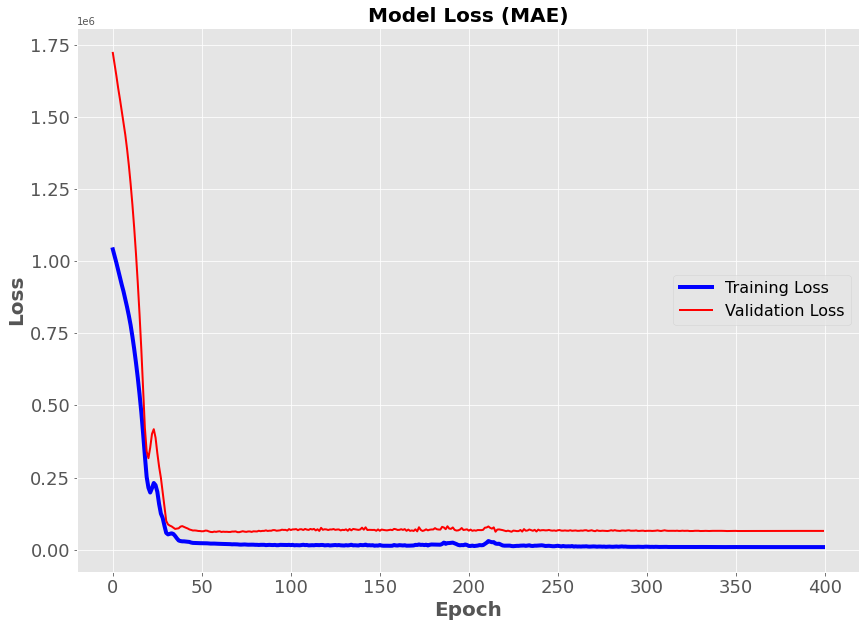

In [201]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(metrics["MAE"], '-b', linewidth=4, label="Training Loss")  
ax.plot(metrics["MAE_val"], '-r', linewidth=2, label="Validation Loss")

# You can use metrics["SmoothL1Loss"] and metrics["SmoothL1Loss_val"] too.

ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_xlabel("Epoch", fontsize=20, fontweight="bold")
ax.set_ylabel("Loss", fontsize=20, fontweight="bold")

ax.set_title("Model Loss (MAE)", fontsize=20, fontweight="bold")

## 10. Save the Model

In [40]:
pickle_out = open("forecast_model_v1.pkl", "wb")
pickle.dump(model_final, pickle_out)
pickle_out.close() 

In [138]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))